In [189]:
%pylab inline
from octopus import orbit_cm
from pygadgetreader import *
from octopus import profiles
from octopus import shapes

Populating the interactive namespace from numpy and matplotlib


In [50]:
font = {'size':16, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [234]:
lmc_orbit = np.loadtxt('LMC_orbit/orbits/LMC6_H1.txt')

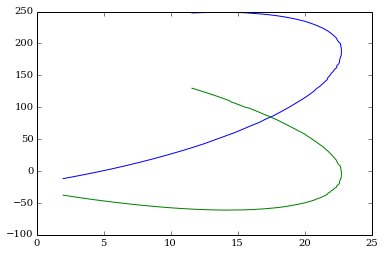

In [245]:
plot(lmc_orbit[:120,2], lmc_orbit[:120,3])
plot(lmc_orbit[:120,2], lmc_orbit[:120,4])

## Objective: 
    
1. Found the most bounded particles of the LMC
2. What is the potential of that inner region

In [374]:
# From the N-body sim
lmci_path = '../data/LMCs/LMC6HR_000.hdf5'

In [376]:
lmci_pos= readsnap(lmci_path, 'pos', 'dm')
lmci_pot= readsnap(lmci_path, 'pot', 'dm')
lmci_ids= readsnap(lmci_path, 'pid', 'dm')


In [375]:
print min(lmci_pot)*0.1

-1314267.4


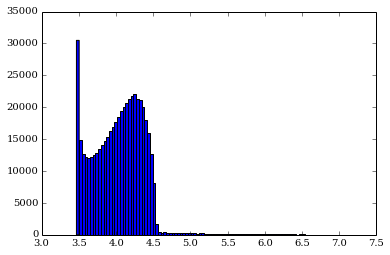

In [275]:
h = hist(np.log10(np.abs(lmci_pot)), bins=100)

In [316]:
10**3.0


1000.0

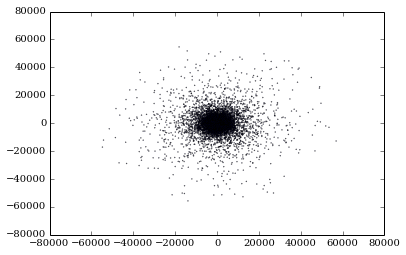

In [277]:
scatter(lmci_pos[:,0], lmci_pos[:,1], s=0.1)

In [344]:
index_bounded = np.where( (np.abs(lmci_pot) > 10**(4.5)))[0] # selecting the most bound particles
print len(index_bounded)

15958


(-100, 100)

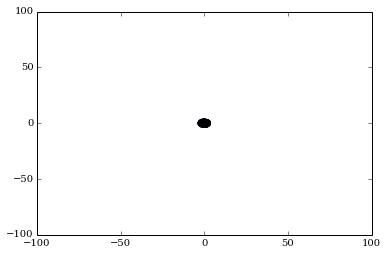

In [380]:
scatter(lmci_pos[index_bounded,0], lmci_pos[index_bounded,1], s=0.1)
lmc_b = lmci_pos[index_bounded]
index_c = np.where(np.sqrt(lmc_b[:,0]**2.0 + lmc_b[:,1]**2.0 + lmc_b[:,2]**2.0) < 30)[0] # most bound and inner particles
xlim(-100, 100)
ylim(-100, 100)

(-5.0, 5.0, -5.0, 5.0)

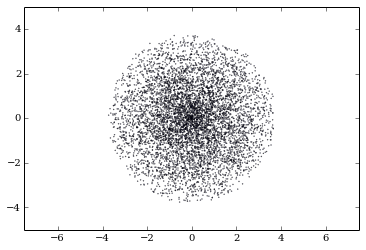

In [382]:
scatter(lmc_b[index_c,0], lmc_b[index_c,1], s=0.1)
axis('equal')

In [383]:
lmc_path = '../data/LMCMW/MWmLMC6/H1/'
lmc_snap = 'MWfLMC6H1'
N_snaps = 120

In [384]:
def mw_particles(xyz, vxyz, pot, ids, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    index_lmc = np.where(ids>=id_cut)[0]
    LMC_pos = xyz[index_lmc]
    LMC_vel = vxyz[index_lmc]
    LMC_pot = pot[index_lmc]
    LMC_ids = ids[index_lmc]
    #index_cut = np.where(np.sqrt(LMC_pos[:,0]**2.0 + LMC_pos[:,1]**2.0 + LMC_pos[:,2]**2.0) <600)[0]
    return xyz[index_mw], vxyz[index_mw], LMC_pos, LMC_vel, LMC_pot, LMC_ids

In [385]:
def pot_contour(x, y, pot, n_bins):
    x_pot = np.linspace(min(x), max(x), n_bins)
    y_pot = np.linspace(min(y), max(y), n_bins)
    pot_grid = np.zeros((n_bins,  n_bins))

    for i in range(1,n_bins):
        for j in range(1,n_bins):
            index = np.where((x<x_pot[i]) & (x>x_pot[i-1]) & (y<y_pot[j]) & (y>y_pot[j-1]))[0]
            pot_grid[i][j] = np.mean(pot[index])
    return x_pot, y_pot, pot_grid

In [461]:
def inner_particles_ids(xic, yic, zic, LMC_pos, LMC_ids, radii):
    index_core = np.where(np.sqrt((LMC_pos[:,0]-xic)**2.0 + (LMC_pos[:,1]-yic)**2.0 + 
                                  (LMC_pos[:,2]-zic)**2.0)<radii)[0]
    LMC_coreids = LMC_ids[index_core]
    return LMC_coreids
    
def inner_particles(LMC_pos, LMC_vel, LMC_core_ids):
    index_fcore = np.zeros(len(LMC_core_ids))
    for i in range(len(LMC_core_ids)):
        index_fcore[i] = np.where(LMCf_ids == LMC_coreids[i])[0]
    index_fcore = index_fcore.astype(int)
    return LMC_pos[index_fcore], LMC_vel[index_fcore]

In [455]:
pos_i = readsnap(lmc_path + lmc_snap + '_000', 'pos', 'dm')
vel_i = readsnap(lmc_path + lmc_snap + '_000', 'vel', 'dm')
pot_i = readsnap(lmc_path + lmc_snap + '_000', 'vel', 'dm')
pids_i = readsnap(lmc_path + lmc_snap + '_000', 'pid', 'dm')
MWi_pos, MWi_vel, LMCi_pos, LMCi_vel, LMCi_pot, LMCi_ids = mw_particles(pos_i, vel_i, pot_i, pids_i, 1000000)

In [458]:
Rcmi, Vcmi = orbit_cm.CM(LMCi_pos, LMCi_vel, 0.03)
print Rcmi, Vcmi

[  10.22767857  248.13188169  128.15490611] [ 12.00622476  11.1957386  -77.19610011]


In [516]:
index_core = np.where(np.sqrt((LMCi_pos[:,0]-11.58)**2.0 + (LMCi_pos[:,1]-247.79)**2.0 + (LMCi_pos[:,2]-129.9)**2.0)<30)[0]

In [517]:
LMC_coreids = LMCi_ids[index_core]

In [570]:
Rcm_t = np.zeros((61,3))
Vcm_t = np.zeros((61,3))
for i in range(0,61,2):
    pos = readsnap(lmc_path + lmc_snap + '_{:03d}'.format(i), 'pos', 'dm')
    vel = readsnap(lmc_path + lmc_snap + '_{:03d}'.format(i), 'vel', 'dm')
    pot = readsnap(lmc_path + lmc_snap + '_{:03d}'.format(i), 'pot', 'dm')
    pids = readsnap(lmc_path + lmc_snap + '_{:03d}'.format(i), 'pid', 'dm')
    MW_pos, MW_vel, LMC_pos, LMC_vel, LMC_pot, LMC_ids = mw_particles(pos, vel, pot, pids, 1000000)
    LMC_pos_core, LMC_vel_core = inner_particles(LMC_pos, LMC_vel, LMC_coreids)
    print len(LMC_pos_core)
    Rcm_t[i], Vcm_t[i] = orbit_cm.CM(LMC_pos_core, LMC_vel_core, 0.001)
    print i
    

172894
0
172894
2
172894
4
172894
6
172894
8
172894
10
172894
12
172894
14
172894
16
172894
18
172894
20
172894
22


KeyboardInterrupt: 

[ 0.  0.  0.]


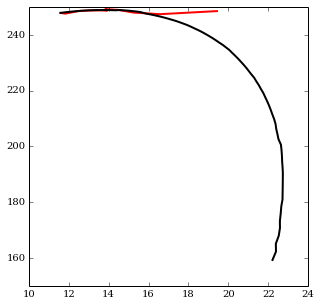

In [575]:
figure(figsize=(5,5))
print Rcm_t[59]
plot(Rcm_t[:22:2,0], Rcm_t[:22:2,1], lw=2.0, c='r')
plot(lmc_orbit[:83,2], lmc_orbit[:83,3], lw=2.0, c='k')

In [576]:
pos_f = readsnap(lmc_path + lmc_snap + '_119', 'pos', 'dm')
vel_f = readsnap(lmc_path + lmc_snap + '_119', 'vel', 'dm')
pot_f = readsnap(lmc_path + lmc_snap + '_119', 'pot', 'dm')
pids_f = readsnap(lmc_path + lmc_snap + '_119', 'pid', 'dm')
MWf_pos, MWf_vel, LMCf_pos, LMCf_vel, LMCf_pot, LMCf_ids = mw_particles(pos_f, vel_f, pot_f, pids_f, 1000000)



In [577]:
LMCf_pos_core, LMCf_vel_core = inner_particles(LMCf_pos, LMCf_vel, LMC_coreids)
Rcmf, Vcmf = orbit_cm.CM(LMCf_pos_core, LMCf_vel_core, 0.3)


In [583]:
#Rcmf2, Vcmf2 = orbit_cm.CM(LMCf_pos_core, LMCf_vel_core, 0.03)
Rcmf3, Vcmf3 = orbit_cm.CM(LMCf_pos_core, LMCf_vel_core, 0.001)
print Rcmf3


[  1.95687103 -11.8505189  -37.75517898]


In [590]:
print lmc_orbit[119, 2], lmc_orbit[119,3], lmc_orbit[119,4]

1.959464 -11.916706 -37.863759


(-50, 50)

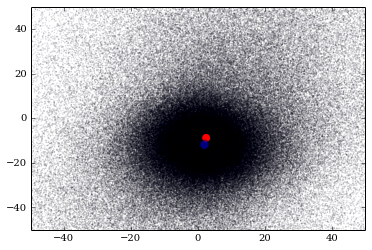

In [586]:
scatter(LMCf_pos[:,0], LMCf_pos[:,1], s=0.1, alpha=0.2)
#scatter(LMCf_pos_core[:,0], LMCf_pos_core[:,1], s=0.1)
scatter(Rcmf[0], Rcmf[1], c='r', s=80)
scatter(Rcmf3[0], Rcmf3[1], c='b', s=80, alpha=0.5)
xlim(-50, 50)
ylim(-50, 50)


In [499]:
index_fcore = np.zeros(len(LMC_coreids))
for i in range(len(LMC_coreids)):
    index_fcore[i] = np.where(LMCf_ids == LMC_coreids[i])[0]
print len(index_fcore)

248164


In [500]:
index_fcore = index_fcore.astype(int)

(0, 400)

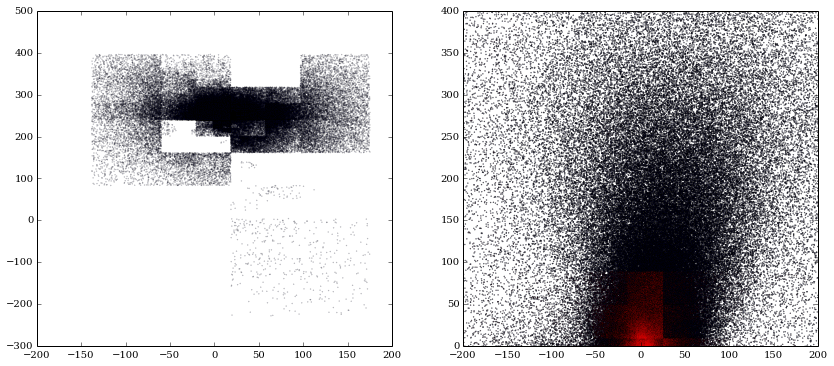

In [591]:
figure(figsize=(14,6))
subplot(1, 2, 1)
scatter(LMC_pos[index_core, 0], LMC_pos[index_core, 1], s=0.1, alpha=0.4)
subplot(1, 2, 2)
scatter(LMCf_pos[:,0], LMCf_pos[:,1], s=0.1)
scatter(LMCf_pos[index_fcore, 0], LMCf_pos[index_fcore, 1], s=0.1, alpha=0.4, edgecolors='none', c='r')
xlim(-200, 200)
ylim(0, 400)

(-200, 200)

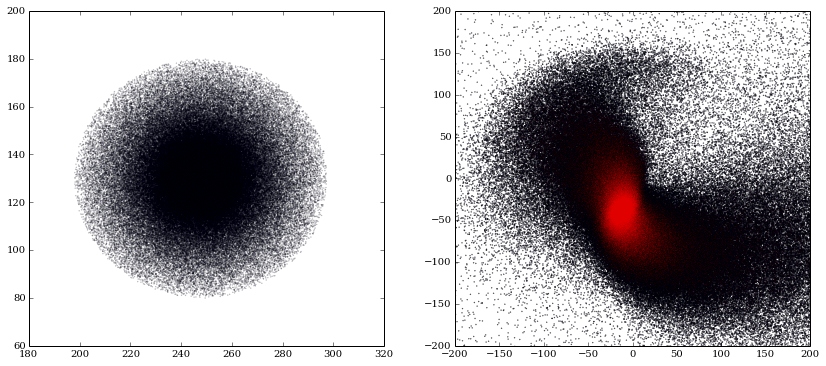

In [450]:
figure(figsize=(14,6))
subplot(1, 2, 1)
scatter(LMC_pos[index_core, 1], LMC_pos[index_core, 2], s=0.1, alpha=0.4)
subplot(1, 2, 2)
scatter(LMCf_pos[:,1], LMCf_pos[:,2], s=0.1)
scatter(LMCf_pos[index_fcore, 1], LMCf_pos[index_fcore, 2], s=0.1, alpha=0.4, edgecolors='none', c='r')
xlim(-200, 200)
ylim(-200, 200)

In [451]:
Rcm, Vcm = orbit_cm.CM(LMCf_pos[index_fcore], LMCf_vel[index_fcore], 0.03)

In [452]:
print Rcm, Vcm

[  2.88773664  -5.91881714 -39.42433572] [ -51.01949533 -212.53935736  153.07123573]


In [453]:
Rcm_all, Vcm_all = orbit_cm.CM(LMCf_pos, LMCf_vel, 0.03)
print Rcm_all, Vcm_all

[  9.34399262  51.65365762 -42.43988008] [ -33.19054242 -162.46523951   76.92844288]


In [255]:
r = np.linspace(5, 200, 50)
s=1
q=1
i =0
while ((np.abs(s-1)< 0.1) & (np.abs(q-1)<0.1) & (i<30)):
    print i
    s, q = shapes.iterate_volume(LMC_pos[:,0], LMC_pos[:,1], LMC_pos[:,2], r[i], 1E-2)
    print s, q
    i+=1

0
0.28490753392 0.580133472594


In [211]:
print s, q, r[i]

0.920734620485 0.936243046201 11.724137931
